In [48]:
import numpy as np
import matplotlib.pyplot as plt

## Initializing Parameters

In [49]:
def initialize_params(dim):
    w = np.zeros((dim, 1))
    b = 0
    return w, b

## Hypothesis Function: y = wx + b

In [50]:
def predict(X, w, b):
    return np.dot(X, w) + b

## Computing Loss (Mean Squared Error)

In [51]:
def loss_compute(X, y, w, b):
    m = X.shape[0]
    predictions = predict(X, w, b)
    loss = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return loss

## Gradient Descent

In [52]:
def gradient_descent(X, y, w, b, learning_rate, num_iterations):
    m = X.shape[0]
    loss_history = []

    for i in range(num_iterations):
        predictions = predict(X, w, b)
        
        # Calculate gradients
        dw = (1 / m) * np.dot(X.T, (predictions - y))
        db = (1 / m) * np.sum(predictions - y)
        
        # Update parameters
        w -= learning_rate * dw
        b -= learning_rate * db
        
        # Calculate and record the cost
        loss = loss_compute(X, y, w, b)
        loss_history.append(loss)
        
        if i % 100 == 0:
            print("Iteration {}: Loss {}".format(i, loss))

    return w, b, loss_history


## Generating synthetic data

In [53]:
np.random.seed(42)
X = 10 * np.random.rand(100, 1)
y = 50 + 3 * X + np.random.randn(100, 1)

## Visualizing the generated data

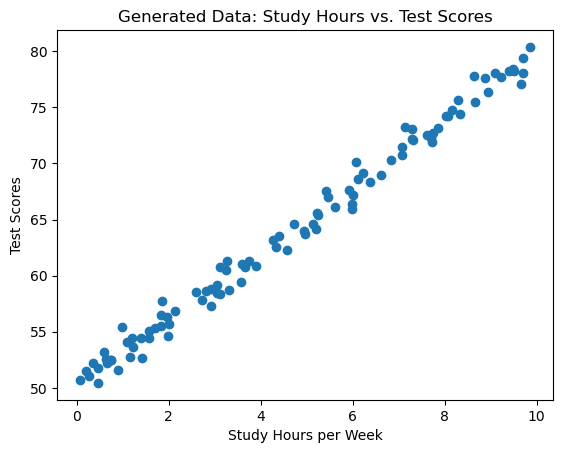

In [54]:
plt.scatter(X, y)
plt.xlabel("Study Hours per Week")
plt.ylabel("Test Scores")
plt.title("Generated Data: Study Hours vs. Test Scores")
plt.show()

## Hyperparameters

In [55]:
learning_rate = 0.01
num_iterations = 1000

## Initializing parameters

In [56]:
w, b = initialize_params(X.shape[1])

## Training the model

In [57]:
w, b, loss_history = gradient_descent(X, y, w, b, learning_rate, num_iterations)

print(f"\nTrained weights: {w}")
print(f"Trained bias: {b}")

Iteration 0: Loss 1156.444304473836
Iteration 100: Loss 191.82029085922696
Iteration 200: Loss 110.24093537762094
Iteration 300: Loss 63.42960619598135
Iteration 400: Loss 36.568637182247166
Iteration 500: Loss 21.15545261837506
Iteration 600: Loss 12.31116043075836
Iteration 700: Loss 7.2361868601901485
Iteration 800: Loss 4.3240989061053945
Iteration 900: Loss 2.6531037502870034

Trained weights: [[3.41882915]]
Trained bias: 47.190947747382076


## Making Predictions

In [58]:
X_test = np.array([[6], [7], [14]])
predictions = predict(X_test, w, b)
print(f"Predictions: {predictions}")

Predictions: [[67.70392263]
 [71.12275177]
 [95.0545558 ]]


## Plotting regression line

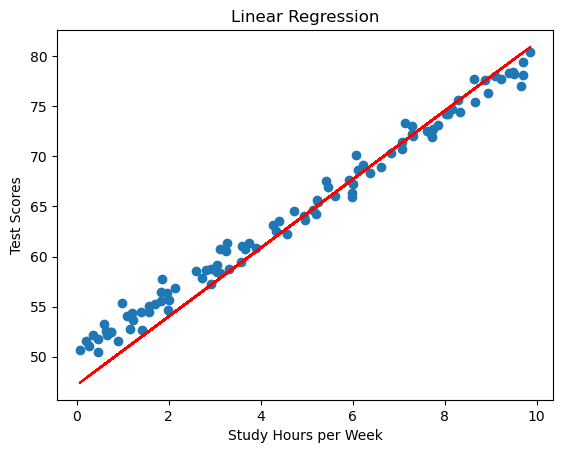

In [59]:
plt.scatter(X, y)
plt.plot(X, predict(X, w, b), color='red')
plt.xlabel("Study Hours per Week")
plt.ylabel("Test Scores")
plt.title("Linear Regression")
plt.show()

## Plotting loss over iterations

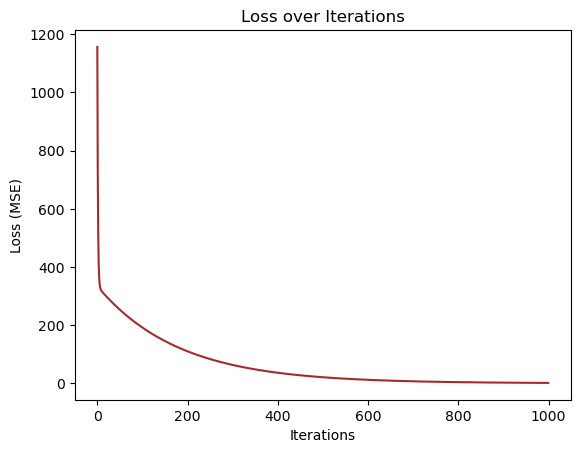

In [60]:
plt.plot(range(num_iterations), loss_history, color='brown')
plt.xlabel("Iterations")
plt.ylabel("Loss (MSE)")
plt.title("Loss over Iterations")
plt.show()